<a href="https://colab.research.google.com/github/OFKadi/Bitirme_Projesi/blob/main/Jupyter_Notebooks/Orthogonality_Ass_Laguerre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import scipy.special as ss
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import math

from scipy.integrate import solve_ivp, quadrature, quad

Orthogonality Relation of Associated Laguerre Polynomials

\begin{align}
\int_{0}^{\infty}e^{-x}x^{k}L_{n}^{k}(x)L_{m}^{k}(x) \, dx = \frac{(n+k)!}{n!} δ_{nm}
\end{align}

In [ ]:
def orth_func(x, n, m, k):
  """
  Associated Laguerre polinomları için ortagolallik fonksiyonu.
  İntegralin içindeki fonksiyon.

  Param x: x
  Param y: integrasyon için dummy variable
  Param n: İlk Associated Laguerre polinom alt indisi
  Param m: İkinci Associated Laguerre polinom alt indisi
  Param k: Associated Laguerre polinomların ortak üst indisi

  Return: Associated Laguerre polinomları için ortagolallik fonksiyonu değeri.
  """
  return np.exp(-x)*np.power(x, k)*ss.assoc_laguerre(x, n, k)*ss.assoc_laguerre(x, m, k)

In [ ]:
def orth_res(n, m, k):
  """
  İki Associated Laguerre plinomu için ortagolallik hesaplayıcı.

  Param n: İlk Associated Laguerre polinom alt indisi
  Param m: İkinci Associated Laguerre polinom alt indisi
  Param k: Associated Laguerre polinomların ortak üst indisi

  Return: Ortagonallik işlemi sonucu.
  """
  return ss.factorial(n+k)/ss.factorial(n) if n == m else 0

İlk 5 Associated Laguerre plinomları ortanolrmallik ilişkisi fonksiyonu:

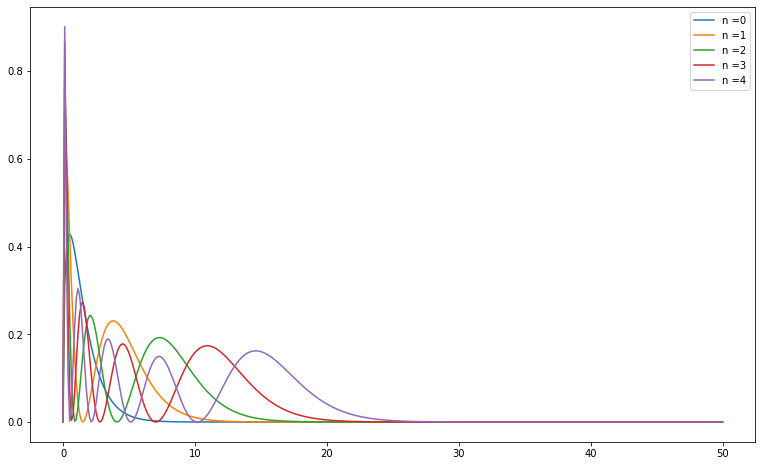

In [ ]:
r = np.linspace(0, 50, 400)
plt.figure(figsize=(13, 8))
for i in range(5):
  plt.plot(r, orth_func(r, i, i, 1/2), label='n =' +str(i))

plt.legend(loc='best')



Associated Laguerre plinomlarının ortanorallik bağıntılarının nümerik ve hesta hesabı. Not: n = 170'e kadar hesap hapılıyor ve referans doğru değer arasındaki fark order of magnitude olarak hesaplanıyor


In [ ]:
import warnings
# warnings.filterwarnings("default")
warnings.filterwarnings("error")

In [ ]:
nMax, mMax = 170, 170
b = np.inf
bmax = 24000
err_matrix = np.zeros([nMax, nMax])
for n in range(nMax):
  b = np.inf
  print(n) if n%10 == 9 else print(n, end='-')
  for m in range(n, mMax):
    while True:
      try:
        sol = quad(orth_func, 0, b, args=(n, m, 1/2), limit=200)
        break
      except Warning as e:
        if b == np.inf:
          b = bmax
        else:
          b = b - 100
    err = abs(sol[0] - orth_res(n, m, 1/2))
    err_matrix[n][m] = np.abs(math.floor(math.log10(err))) if err != 0 else 22
    if(n != m):
      err_matrix[m][n] = err_matrix[n][m] 


0-1-2-3-4-5-6-7-8-9
10-11-12-13-14-15-16-17-18-19
20-21-22-23-24-25-26-27-28-29
30-31-32-33-34-35-36-37-38-39
40-41-42-43-44-45-46-47-48-49
50-51-52-53-54-55-56-57-58-59
60-61-62-63-64-65-66-67-68-69
70-71-72-73-74-75-76-77-78-79
80-81-82-83-84-85-86-87-88-89
90-91-92-93-94-95-96-97-98-99
100-101-102-103-104-105-106-107-108-109
110-111-112-113-114-115-116-117-118-119
120-121-122-123-124-125-126-127-128-129
130-131-132-133-134-135-136-137-138-139
140-141-142-143-144-145-146-147-148-149
150-151-152-153-154-155-156-157-158-159
160-161-162-163-164-165-166-167-168-169


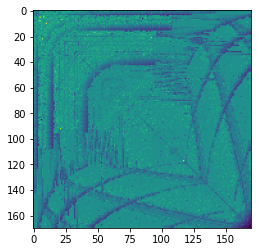

In [ ]:
plt.imshow(err_matrix)

In [ ]:
print("Maksimum virgülden sonra doğruluk: ", np.max(err_matrix))
print("Minimum virgülden sonra doğruluk: ", np.min(err_matrix))

Maksimum virgülden sonra doğruluk:  22.0
Minimum virgülden sonra doğruluk:  8.0
